In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

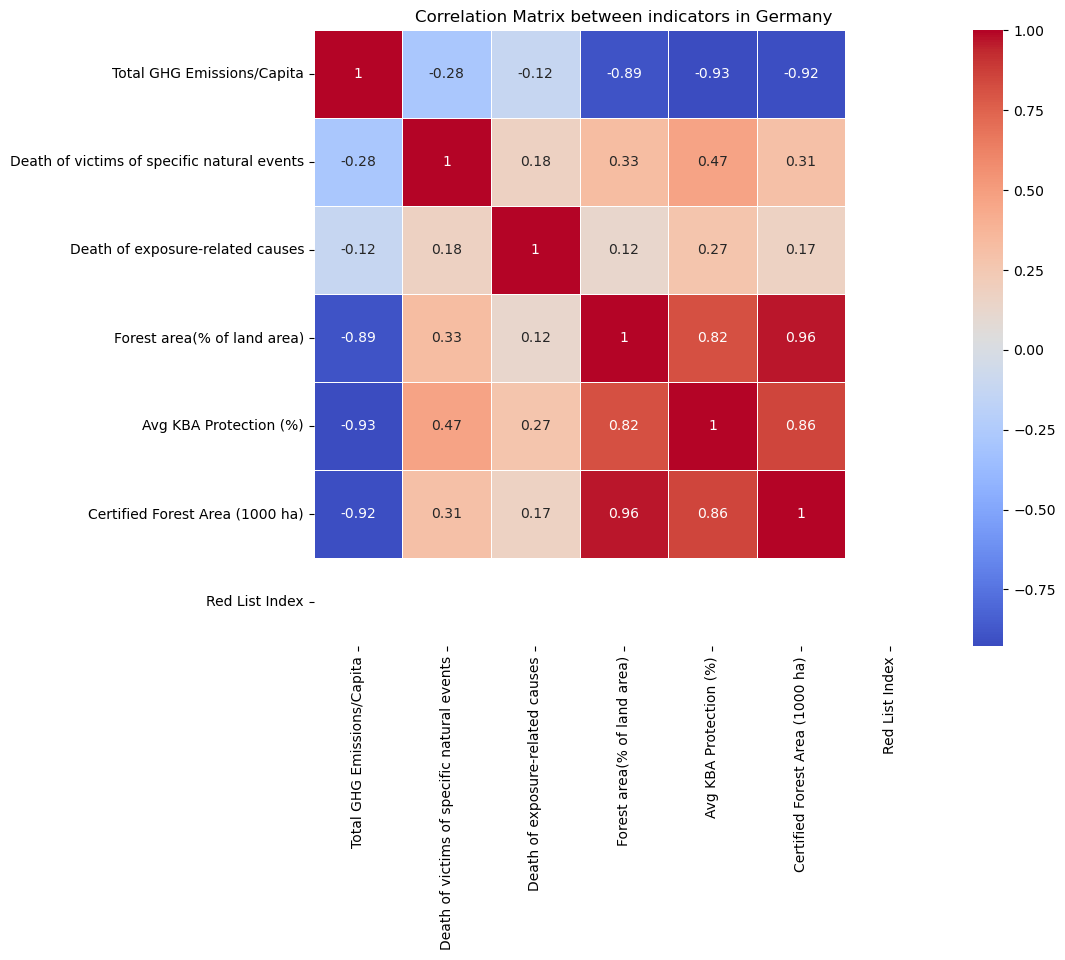

In [7]:

file_path = '../data/Germany_data.csv'
df = pd.read_csv(file_path)

# Filter data for Germany
df_germany = df[df['Country'] == 'Germany']

# Drop the 'Year' column and keep relevant columns for analysis
predictor_columns = df_germany.drop(columns=['Year'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns.drop(columns=['Country']))
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.drop(columns=['Country']).columns)

# Reordering the columns to match the order you specified
new_column_order = [
    'Total GHG Emissions/Capita',
    'Death of victims of specific natural events',
    'Death of exposure-related causes',
    'Forest area(% of land area)',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas',
    'Terrestrial and freshwater areas covered by protected areas',
    'Red List Index'
]

# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas': 'Avg KBA Protection (%)',
    'Terrestrial and freshwater areas covered by protected areas': 'Certified Forest Area (1000 ha)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in Germany')
plt.show()


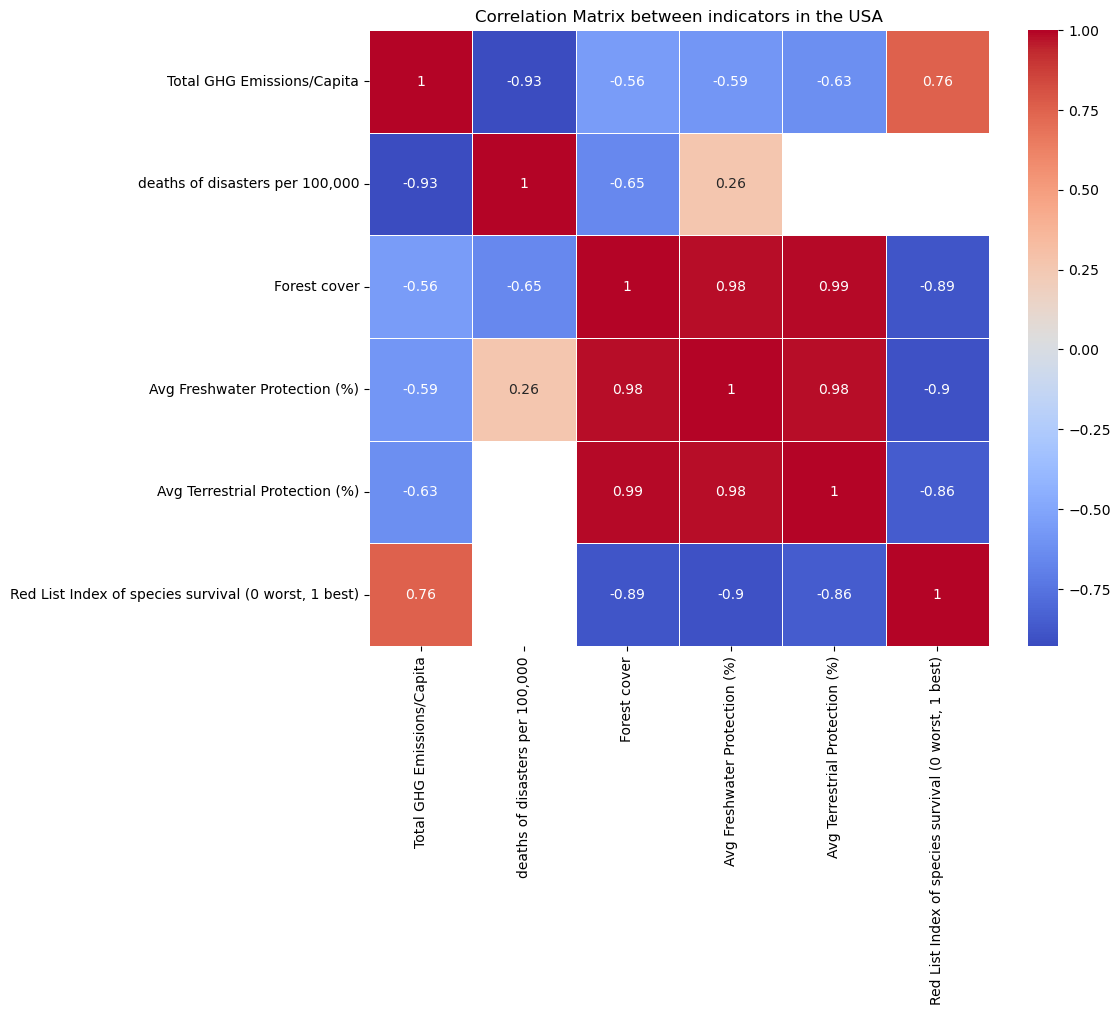

In [8]:
file_path = '../data/USA_data.csv'
df = pd.read_csv(file_path)

# Filter data for USA
df_usa = df[df['Country'] == 'USA']

# Drop the 'Year' column and keep relevant columns for analysis
predictor_columns = df_usa.drop(columns=['Year'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns.drop(columns=['Country']))
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.drop(columns=['Country']).columns)

# Reordering the columns to match the structure needed
new_column_order = [
    'Total GHG Emissions/Capita',
    'deaths of disasters per 100,000',
    'Forest cover',
    'Mean area protected in freshwater (%)',
    'Mean area protected in terrestrial (%)',
    'Red List Index of species survival (0 worst, 1 best)'
]

# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Mean area protected in freshwater (%)': 'Avg Freshwater Protection (%)',
    'Mean area protected in terrestrial (%)': 'Avg Terrestrial Protection (%)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in the USA')
plt.show()
